# Digit Recognizer

Learn computer vision fundamentals with the famous MNIST data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
labeled_images = pd.read_csv('../data/Digits/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]


In [3]:
## build train and test data sets from training data set
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=587)

/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


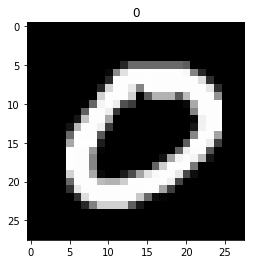

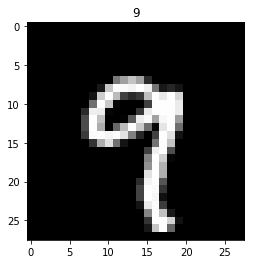

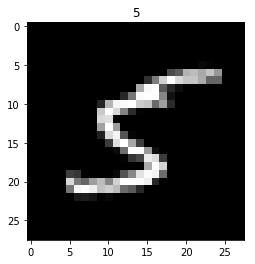

In [4]:
for i in range(3):
    img=train_images.iloc[i].as_matrix()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(train_labels.iloc[i,0])
    plt.show()

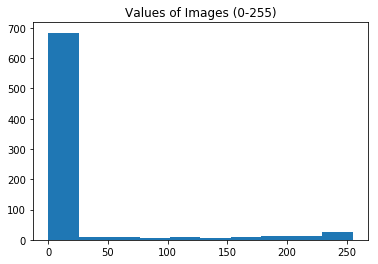

In [5]:
plt.hist(train_images.iloc[2])
plt.title("Values of Images (0-255)")
plt.show()

In [6]:
clf = svm.SVC(C=3, cache_size=500)
clf.fit(train_images, train_labels.values.ravel())

SVC(C=3, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.score(test_images,test_labels)

0.20999999999999999

In [8]:
simple = test_images.iloc[1, :]
#simple

In [9]:
simple[simple > 0] = 1

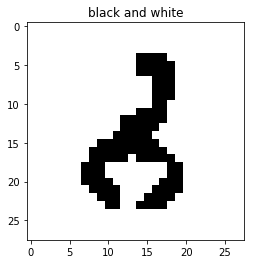

In [10]:
img=simple.as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title("black and white")
plt.show()

In [11]:
train_images = train_images.applymap(func=lambda x: int(x>0))

In [12]:
clf = svm.SVC(kernel = 'rbf', C = 4, cache_size=500)
clf.fit(train_images, train_labels.values.ravel())

SVC(C=4, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
test_images = test_images.applymap(func=lambda x: int(x>0))

In [14]:
clf.score(test_images,test_labels)

0.91200000000000003

## Predictions per Class

In [15]:
pred_df = train_labels.copy()
pred_df['pred'] = clf.predict(train_images)

In [16]:
grouped = pred_df.groupby(by = 'label')

In [17]:
grouped.apply(lambda x: np.mean(x['label'] == x['pred']))

label
0    0.985149
1    0.983945
2    0.974771
3    0.955729
4    0.970430
5    0.950521
6    0.992958
7    0.970588
8    0.945596
9    0.928571
dtype: float64

In [18]:
grouped = pred_df.groupby(by = 'pred')
grouped.apply(lambda x: np.mean(x['label'] == x['pred']))

pred
0    0.982716
1    0.975000
2    0.970320
3    0.968338
4    0.945026
5    0.960526
6    0.965753
7    0.977778
8    0.963061
9    0.954802
dtype: float64

No one label performs significantly worse than the other

## Cross Validation


Fitting is much better, but now we need to perform cross validation. Instead of simply using a training & test data split, perform k=8 train/test splits and performance review.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
images = images.applymap(func=lambda x: int(x>0))

In [21]:
#help(cross_val_score)

In [22]:
model = svm.SVC(kernel = 'rbf', C = 4, cache_size=500)
scores = cross_val_score(model, images, labels, cv=8)

/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonathan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [23]:
scores

array([ 0.91255962,  0.92515924,  0.93620415,  0.92822967,  0.92811502,
        0.91813804,  0.94516129,  0.93709677])

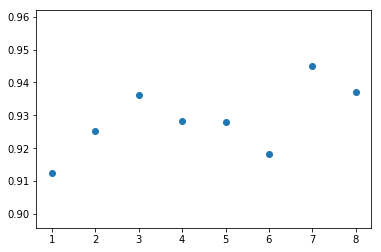

In [24]:
plt.scatter(x = np.arange(1, 8+1), y = scores)
plt.show()

## Evaluate the classifier  

Use the Test Data Set

In [25]:
eval_data=pd.read_csv('../data/Digits/test.csv')
eval_data[eval_data>0]=1


In [29]:
results=clf.predict(eval_data)

In [40]:
df = pd.DataFrame(results)
df.index+=1



In [42]:
df.reset_index(drop=False, inplace=True)

In [44]:
df.columns=['ImageId', 'Label']
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2


In [45]:
df.to_csv('../data/Digits/results.csv', header=True, index=False)

In [46]:
eval_data.shape

(28000, 784)

In [47]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2


In [39]:
eval_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
